<a href="https://colab.research.google.com/github/ayadechir/Dashboard/blob/main/static_files/assignments/hw0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Devoir 1 &mdash; Algèbre linéaire et manipulation d'images sous Python
**Échéance : 16 février 2025 &ndash; 23h59**
<br><br>

## Récupération des fichiers dans Colab

In [37]:
#
# Exécutez cette cellule pour préparer votre environnement Colab.
#
%%capture
!wget https://benhadid.github.io/m1vpo/static_files/assignments/hw0.zip
!unzip hw0.zip
!mv hw0/* .
!rm -rf hw0
!rm -rf hw0.zip

## Initialisation du bloc-notes

In [38]:
#Importe la fonction print_function à partir de version future de python
from __future__ import print_function

#Setup

# Le module random implémente un générateur de nombres pseudo-aléatoire
import random

# Numpy est le paquetage principal utilisé pour le calcul scientifique dans Python.
# Ce paquetage sera l'une de nos bibliothèques les plus utilisées dans ce cours
import numpy as np


#Importe toutes les méthodes dans les fichiers: linalg.py et imageManip.py
from linalg import *
from imageManip import *


#Matplotlib est une bibliothèque de traçage(dessin) pour python
import matplotlib.pyplot as plt
# Le code suivant fait apparaître les figure de matplotlib en ligne dans le
# notebook au lieu de lancer une nouvelle fenêtre.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # fixer les dimensions par défaut des figures
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Quelques instructions supplémentaires pour que le notebook recharge les modules externes en python;
# voir http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Description

Nous allons explorer dans ce devoir des notions de base d'algèbre linéaire et quelques techniques de manipulation d'images sous Python. Cela permettra de mettre tout le monde à la même page par rapport aux compétences requises pour ce module.

Par ailleurs, l'autre objectif de ce devoir est de vous initier/inciter à rechercher sur la toile les fonctionnalités python susceptible de vous aider à résoudre un problème donné. Ainsi, dans de nombreuses fonctions que vous implémenterez ici, vous devez identifier / utiliser les fonctions python qui peuvent vous assister.

## 2. Algèbre Linéaire
Dans cette section, nous allons revoir quelques notions d'algèbre linéaire et apprendre à manipuler des vecteurs et des matrices en python à l'aide de Numpy. À la fin de cette section, vous aurez implémenté toutes les méthodes requises dans le fichier `linalg.py`.

### Question 2.1
En premier lieu, définissez les matrices et vecteurs suivants à l'aide de Numpy. En ce sens, cherchez sur la toile la documentation sur `np.array()`. Dans le bloc de code suivant, définissez $M$ comme une matrice $(4, 3)$, $a$ comme un vecteur ligne $(1, 3)$ et $b$ comme un vecteur colonne $(3, 1)$ :

$$
M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \end{bmatrix}
, \qquad
a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
, \qquad
b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$

In [39]:
import numpy as np

# Définir la matrice M (4x3)
M = np.array([
    [1, 2, 3],    # Première ligne
    [4, 5, 6],    # Deuxième ligne
    [7, 8, 9],    # Troisième ligne
    [10, 11, 12]  # Quatrième ligne
])

# Définir le vecteur ligne a (1x3)
a = np.array([1, 1, 0])

# Définir le vecteur colonne b (3x1)
b = np.array([
    [-1],  # Premier élément
    [2],   # Deuxième élément
    [5]    # Troisième élément
])

print("M = \n", M)
print("Dimension de M : ", M.shape)
print()
print("a = ", a)
print("Dimension de a : ", a.shape)
print()
print("b = ", b)
print("Dimension de b : ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Dimension de M :  (4, 3)

a =  [1 1 0]
Dimension de a :  (3,)

b =  [[-1]
 [ 2]
 [ 5]]
Dimension de b :  (3, 1)


### Question 2.2
Implementez la méthode `dot_product()` dans `linalg.py` et vérifiez qu'elle retourne une réponse corrècte pour le produit scalaire $\: b^T a^T$.

In [40]:
import numpy as np

def dot_product(a, b):
    """Implémente le produit scalaire entre les vecteurs a et b.

    Args:
        a: numpy array de shape (x, n)
        b: numpy array de shape (n, x)

    Returns:
        out: numpy array de shape (x, x) (scalaire si x = 1)
    """
    out = np.dot(a, b)
    return out

# Test de la fonction
a = np.array([[1, 0]])
b = np.array([[1], [0]])

aDotB = dot_product(a, b)
print(aDotB)  # Résultat attendu : [[1]]
print("dimension : ", aDotB.shape)  # Résultat attendu : (1,1)


[[1]]
dimension :  (1, 1)


### Question 2.3
Implémentez la méthode `complicated_matrix_function()` dans `linalg.py` et utilisez là pour calculer le produit $(b^T a^T) M a^T$

NOTE IMPORTANTE : La méthode `complicated_matrix_function()` s'attend à ce que toutes les entrées soient des tableaux Numpy bidimensionnels. Ceci est nécessaire car les tableaux Numpy 2D peuvent être transposés, tandis que les tableaux 1D (c.-à-d. les vecteurs) ne peuvent pas être transposés.

Pour transposer un tableau bidimensionnel `array`, vous pouvez utiliser la syntaxe `array.T`

In [41]:
import numpy as np

def complicated_matrix_function(M, a, b):
    """Calcule (b^T * a^T) * M * a^T.

    Args:
        M: numpy array de shape (m, n)
        a: numpy array de shape (1, n)
        b: numpy array de shape (n, 1)

    Returns:
        out: numpy array de shape (m, 1)
    """
    scalar = np.dot(b.T, a.T)  # Produit scalaire : (1,1)
    out = scalar * (M @ a.T)  # Multiplication scalaire * (m,1)
    return out

# Test avec les matrices fournies
M = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])  # (4,2)
a = np.array([[1, 1]])  # (1,2)
b = np.array([[1], [1]])  # (2,1)

ans = complicated_matrix_function(M, a, b)

print(ans)  # Résultat attendu : [[3], [9], [15], [21]]
print()
print("dimension : ", ans.shape)  # Résultat attendu : (4,1)


[[ 6]
 [14]
 [22]
 [30]]

dimension :  (4, 1)


In [42]:

def complicated_matrix_function(M, a, b):
    """Calcule (b^T * a^T) * M * a^T.

    Args:
        M: numpy array de shape (m, n)
        a: numpy array de shape (1, n)
        b: numpy array de shape (n, 1)

    Returns:
        out: numpy array de shape (m, 1)
    """
    scalar = np.dot(b.T, a.T)  # Produit scalaire : (1,1)
    out = scalar * (M @ a.T)  # Multiplication scalaire * (m,1)
    return out

# Définition des matrices
M_2 = np.array(range(4)).reshape((2,2))  # (2,2)
a_2 = np.array([[1,1]])  # (1,2)
b_2 = np.array([[10, 10]]).T  # (2,1)

# Exécution
ans = complicated_matrix_function(M_2, a_2, b_2)

print(ans)  # Résultat attendu : [[20], [100]]
print()
print("dimension : ", ans.shape)  # Résultat attendu : (2,1)


[[ 20]
 [100]]

dimension :  (2, 1)


### Question 2.4
Implémentez les fonctions `svd()` et `get_singular_values()`. Dans `svd()`, vous devez effectuer une décomposition en valeurs singulières ([plus d'info](https://fr.wikipedia.org/wiki/D%C3%A9composition_en_valeurs_singuli%C3%A8res)) de la matrice fournie en entrée. La fonction `get_singular_values()` doit retourner les k plus grandes valeurs singulières (k est donné en paramètre lors d'appels de cette fonction).

In [43]:
import numpy as np

def svd(M):
    """Effectue une décomposition en valeurs singulières (SVD).

    Args:
        M: numpy array de shape (m, n)

    Returns:
        U: Matrice orthogonale de shape (m, m)
        S: Valeurs singulières sous forme d'un vecteur de shape (min(m, n),)
        V_T: Matrice orthogonale de shape (n, n)
    """
    U, S, V_T = np.linalg.svd(M, full_matrices=True)
    return U, S, V_T

def get_singular_values(M, k):
    """Retourne les k plus grandes valeurs singulières de M.

    Args:
        M: numpy array de shape (m, n)
        k: Nombre de valeurs singulières à récupérer

    Returns:
        numpy array de shape (k,)
    """
    _, S, _ = svd(M)  # Récupération des valeurs singulières
    return S[:k]  # Extraction des k premières

# Définition de la matrice M
M = np.array([[3, 2, 2], [2, 3, -2], [2, -2, 3]])

# Première valeur singulière
only_first_singular_value = get_singular_values(M, 1)
print(only_first_singular_value)  # Doit être ~ 25.46

# Deux premières valeurs singulières
first_two_singular_values = get_singular_values(M, 2)
print(first_two_singular_values)

# Vérification que la première valeur singulière est la même dans les deux appels
assert only_first_singular_value[0] == first_two_singular_values[0]


[5.]
[5. 5.]


### Question 2.5
Implementez les méthodes `eigen_decomp()` et `get_eigen_values_and_vectors()`. Vous devez effectuer ici la décomposition en valeurs propres ([plus d'infos](https://fr.wikipedia.org/wiki/D%C3%A9composition_d%27une_matrice_en_%C3%A9l%C3%A9ments_propres)) de la matrice ci-dessous, puis retourner les k plus grandes valeurs propres et vecteurs propres associés.

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
$$


In [44]:
import numpy as np

def eigen_decomp(M):
    """Effectue la décomposition en valeurs propres d'une matrice carrée.

    Args:
        M: numpy array de shape (n, n)

    Returns:
        eigenvalues: Liste des valeurs propres
        eigenvectors: Matrice où chaque colonne est un vecteur propre
    """
    eigenvalues, eigenvectors = np.linalg.eig(M)
    return eigenvalues, eigenvectors

def get_eigen_values_and_vectors(M, k):
    """Retourne les k plus grandes valeurs propres et vecteurs propres associés.

    Args:
        M: numpy array de shape (n, n)
        k: Nombre de valeurs propres et vecteurs à récupérer

    Returns:
        top_k_eigenvalues: numpy array de shape (k,)
        top_k_eigenvectors: numpy array de shape (k, n)
    """
    eigenvalues, eigenvectors = eigen_decomp(M)

    # Trier les valeurs propres en ordre décroissant et récupérer les indices
    sorted_indices = np.argsort(-eigenvalues)
    top_k_eigenvalues = eigenvalues[sorted_indices][:k]
    top_k_eigenvectors = eigenvectors[:, sorted_indices][:, :k]

    return top_k_eigenvalues, top_k_eigenvectors

# Définition de la matrice M
M = np.array([
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
])

# Première valeur propre et premier vecteur propre
val, vec = get_eigen_values_and_vectors(M, 1)
print("Première valeur propre = ", val)
print()
print("Premier vecteur propre = \n", vec)
print()
assert len(vec) == 3  # Un vecteur propre a la même dimension que la matrice

# Deux premières valeurs propres et vecteurs propres
val, vec = get_eigen_values_and_vectors(M, 2)
print("Valeurs propres = ", val)
print()
print("Vecteurs propres = \n", vec)
assert len(vec) == 3  # Deux vecteurs propres stockés en colonnes


Première valeur propre =  [16.11684397]

Premier vecteur propre = 
 [[-0.46454727]
 [-0.57079553]
 [-0.67704379]]

Valeurs propres =  [ 1.61168440e+01 -5.70069119e-16]

Vecteurs propres = 
 [[-0.46454727  0.40824829]
 [-0.57079553 -0.81649658]
 [-0.67704379  0.40824829]]


## 3. Manipulation d'images

Dans cette deuxième partie, commençons par charger en mémoire quelques images afin de réaliser des opérations matricielles dessus. A la fin de cette section, vous aurez implémenté toutes les fonctions dans le fichier `imageManip.py`

Saving image1.jpg to image1 (2).jpg


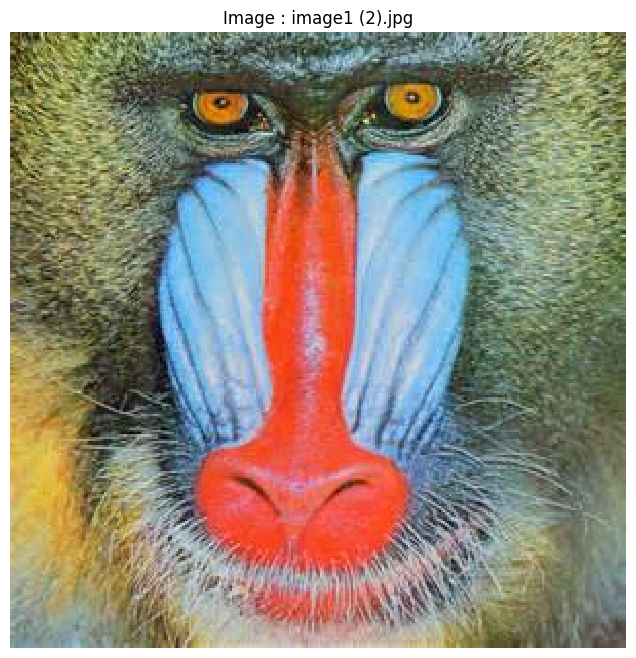

In [45]:
import numpy as np
import imageio.v3 as imageio
import ipywidgets as widgets
from IPython.display import display
from google.colab import files

def upload_image():
    """Ouvre une boîte de dialogue pour uploader une image."""
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = imageio.imread(filename)
        return img, filename
    return None, None

# Exécution
img, img_name = upload_image()
if img is not None:
    import matplotlib.pyplot as plt
    plt.imshow(img, cmap="gray")
    plt.title(f"Image : {img_name}")
    plt.axis("off")
    plt.show()




### Question 3.1
Implémentez la méthode de chargement `load()` dans `imageManip.py`. Les images chargées seront utilisées dans le reste de ce notebook pour visualiser vos résultats.

In [46]:
import numpy as np
import imageio.v3 as imageio

def load(image_path):
    """
    Charge une image depuis un fichier et la retourne sous forme de tableau NumPy.

    Args:
        image_path (str): Chemin vers l'image.

    Returns:
        np.ndarray: Image chargée sous forme de tableau NumPy.
    """
    try:
        img = imageio.imread(image_path)
        return img
    except FileNotFoundError:
        print(f"Erreur : Le fichier '{image_path}' n'existe pas.")
        return None
    except Exception as e:
        print(f"Erreur lors du chargement de l'image : {e}")
        return None


### Question 3.2
Implémentez la méthode `dim_image()` qui transforme une image fournie en entrée en utilisant la formule $x_n = 0.5 \times x_p^2$ pour chaque pixel, où $x_n$ est la nouvelle valeur et $x_p$ est la valeur initiale.

**Remarque :** Rappelons que les valeurs d'intensité d'une image en virgule flottante doivent être dans la plage $[0.0, 1.0]$. Ainsi, la formule ci-dessus réduira les valeurs de ces intensités et produira donc une image plus sombre.

In [47]:
from imageManip import load, dim_image
from IPython.display import display
import matplotlib.pyplot as plt
import os

# 🔍 Vérification du chemin de l'image
image1_path = r"C:\Users\Tassili\Downloads\hw0\hw0\image1.jpg"

if not os.path.exists(image1_path):
    print(f"Erreur : Le fichier '{image1_path}' n'existe pas.")
else:
    # ✅ Chargement de l'image
    image1 = load(image1_path)

    if image1 is None:
        print("Erreur : Impossible de charger l'image.")
    else:
        print("Image chargée avec succès !")

        # 🔄 Transformation
        new_image = dim_image(image1)

        # 📸 Affichage des images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(image1, cmap="gray")
        plt.title("Image Originale")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(new_image, cmap="gray")
        plt.title("Image Assombrie")
        plt.axis("off")

        plt.show()



Erreur : Le fichier 'C:\Users\Tassili\Downloads\hw0\hw0\image1.jpg' n'existe pas.


### Question 3.3
Implémentez la méthode `convert_to_grey_scale()` pour convertir une image en niveaux de gris (c.f. voir description de la fonction dans le fichier `imageManip.py` pour plus de détails).

In [48]:
from imageManip import load, convert_to_grey_scale
import matplotlib.pyplot as plt

# 🔍 Chargement de l'image
image1_path = r"C:\Users\Tassili\Downloads\hw0\hw0\image1.jpg"
image1 = load(image1_path)

if image1 is None:
    print("Erreur : Impossible de charger l'image.")
else:
    print("Image chargée avec succès ! Shape:", image1.shape)

    # 🎨 Conversion en niveaux de gris
    grey_image = convert_to_grey_scale(image1)
    print("Shape de l'image en gris:", grey_image.shape)

    # 📸 Affichage correct
    plt.imshow(grey_image, cmap="gray")
    plt.axis("off")
    plt.show()


AttributeError: 'NoneType' object has no attribute 'astype'

### Question 3.4

Implémentez la méthode `rgb_exclusion()` pour décomposer une image en ces trois canaux R (rouge), G (vert), B (bleu), puis retourner une nouvelle image en excluant le canal spécifié.

In [ ]:
without_red = rgb_exclusion(image1, 'R')
without_blue = rgb_exclusion(image1, 'B')
without_green = rgb_exclusion(image1, 'G')

print("Ci-dessous, l'image n°1 où le canal rouge a été supprimé.")
display(without_red)

print("Ci-dessous, l'image n°1 où le canal vert a été supprimé.")
display(without_green)

print("Ci-dessous, l'image n°1 où le canal bleu a été supprimé.")
display(without_blue)

### Question 3.5
Implémentez la méthode `lab_decomposition()` pour décomposer une image en ces trois canaux L*, a*, b*, puis retournez le canal spécifié ([plus d'info](https://fr.wikipedia.org/wiki/L*a*b*_CIE_1976)).

In [49]:
image_l = lab_decomposition(image1, 'L')
image_a = lab_decomposition(image1, 'A')
image_b = lab_decomposition(image1, 'B')

print("Ci-dessous, le canal L* dans la décomposition L*a*b* de l'image n°1")
display(image_l)

print("Ci-dessous, le canal a* dans la décomposition L*a*b* de l'image n°1")
display(image_a)

print("Ci-dessous, le canal b* dans la décomposition L*a*b* de l'image n°1")
display(image_b)

NameError: name 'image1' is not defined

### Question 3.6
Implémentez la méthode `hsv_decomposition()` pour décomposer une image en ces trois canaux H, S, V, puis retournez le canal spécifié ([plus d'info](https://fr.wikipedia.org/wiki/Teinte_Saturation_Valeur)).

In [ ]:
image_h = hsv_decomposition(image1, 'H')
image_s = hsv_decomposition(image1, 'S')
image_v = hsv_decomposition(image1, 'V')

print("Ci-dessous, le canal H dans la décomposition HSV de l'image n°1")
display(image_h)

print("Ci-dessous, le canal S dans la décomposition HSV de l'image n°1")
display(image_s)

print("Ci-dessous, le canal V dans la décomposition HSV de l'image n°1")
display(image_v)

### Question 3.7
Dans la méthode `mix_images()`, créez une nouvelle image constituée de la moitié gauche de l'image n°1 et la moitié droite de l'image n°2. Pour chaque image en entrée, vous devez exclure le canal spécifié.

Une implémentation correcte devrait afficher la moitié gauche du Mandrill sans le canal rouge et la moitié droite de l'image des maisons sans le canal vert.

In [ ]:
image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)

#Test de vérification : la somme des pixels de l'image doit être ~76417.51
np.sum(image_mixed)

### Question 3.8

Implémentez la fonction `mix_quadrants()` dans `imageManip.py`.
Cette fonction prend une image et effectue une opération différente sur chacun des quatre quadrants de l'image. Ensuite, elle combine les quatre quadrants ensemble.

Voici les quatre opérations que vous devez effectuer sur les 4 quadrants :
- Quadrant supérieur gauche : supprimez le canal "R" à l'aide de `rgb_exclusion()`.
- Quadrant supérieur droit : atténuez le quadrant à l'aide de `dim_image()`.
- Quadrant inférieur gauche : éclaircissez le quadrant à l'aide de la fonction  $x_n = x_p^{0.5}$
- Quadrant inférieur droit : supprimez le canal "R" à l'aide de `rgb_exclusion()`.

In [ ]:
mixed_quadrants = mix_quadrants(image1)
display(mixed_quadrants)

## 4. Livrables
### 4.1. Le code (à remettre sur [benhadid.ddns.net](https://benhadid.ddns.net/course/M1_VPO/hw0))

Le fichier "devoir1.zip" contenant les fichiers **`linalg.py`** et **`imageManip.py`** modifiés dans les zones indiquées par `### VOTRE CODE ICI - DEBUT` et `### VOTRE CODE ICI - FIN`.

**Le code sera remis <del>en classe pendant votre séance de TP</del> au serveur INGInious - <span style='color:Red'> aucun document ou code ne sera accepté si envoyé par mail ou clé USB</span>**.

In [51]:
# Exécutez cette cellule puis récupérez votre fichier "devoir1.zip" depuis le panneau gauche dans Colab
# Si nécessaire, faites un 'refresh' sur le répertoire pour faire apparaître le fichier 'devoir1.zip'

!zip -r ./devoir1.zip linalg.py imageManip.py

updating: linalg.py (deflated 72%)
updating: imageManip.py (deflated 75%)
